# Mini Imlemetation of Autograd from PyTorch

## What is Autograd? (Step-by-Step Explanation)

Autograd, short for **Automatic Differentiation**, is a core feature of modern machine learning frameworks like PyTorch and TensorFlow. It **automatically computes gradients** (i.e., derivatives) of outputs with respect to inputs — which is essential for training machine learning models.

Let’s break it down with a simple, clear example.

---

###  Example Function

Suppose we define a function:

> `f(x) = sin(x² + 1)`

This can be broken down into **two smaller functions**:

- `g(x) = x² + 1`
- `h(z) = sin(z)` where `z = g(x)`

So overall:

> `f(x) = h(g(x))`

---

###  Chain Rule Refresher

We want to find how `f(x)` changes when `x` changes — this is the **gradient** or **derivative**: `df/dx`.

Using the **chain rule** from calculus:

> `df/dx = (df/dg) × (dg/dx)`

Step-by-step:
- `dg/dx = 2x` (since `g(x) = x² + 1`)
- `df/dg = cos(g(x))` (since `f = sin(g)`)

So,

> `df/dx = cos(x² + 1) * 2x`

---

###  What Autograd Does Internally

When you write code like this:

```python
x = torch.tensor(2.0, requires_grad=True)
g = x**2 + 1
f = torch.sin(g)
f.backward()
print(x.grad)
```

Sure! Here's the full explanation in clean, copy-paste ready **Markdown** format for your notebook:

---

```markdown
## 🔁 What Does Autograd Really Do? (No Jargon)

Let’s say you’re doing some math in code like this:

```python
x = torch.tensor(2.0, requires_grad=True)
g = x**2 + 1
f = torch.sin(g)
```

Autograd watches every operation you perform.  
When it sees you do something like `x**2` or `+1`, it doesn’t just calculate the result — it also **remembers** how that result was made.

For **each step**, autograd saves:

1. The **input values** used in the operation  
2. The **function or operation** applied (like square, addition, sine)  
3. The **output result** of the operation  
4. And which variable the output was assigned to (like `g`, `f`)

So autograd builds a kind of **memory or trace** of how each value depends on the ones before it. This called a **Computational Graph**.

**Then What Happens?**

When you finally call:

```python
f.backward()
```

Autograd goes back through all the steps it saved, in reverse order, **(Backpropogation)** and:

- Figures out how much each step contributed to the final result  
- Computes how the final output (`f`) changes with respect to earlier values like `x`  
- Eventually gives you the **gradient**: how sensitive `f` is to small changes in `x`

You don’t need to tell it how to do this — it figures it out using the information it remembered from your code.




In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Let's first see what we are trying to do. We difine soem function f that takes in a scalar and gives out a scalar

def f(x):
    return x**2 +1



In [24]:
# Testing the function
f(3)

10

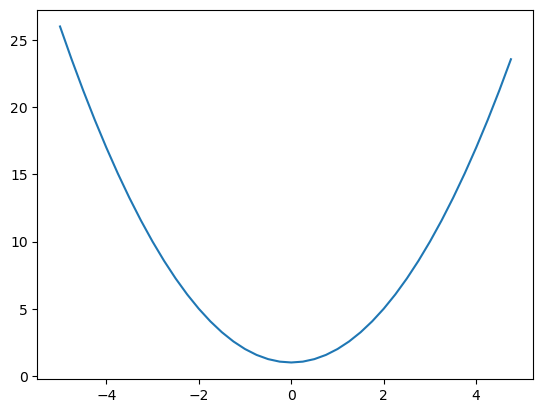

In [25]:
# Let's see how this function looks by plotting it

x = np.arange(-5, 5, 0.25)
y = f(x)

plt.plot(x,y)


In [26]:
# what's the derivative of this function at any given point. (Basically gives the slope)

def derivative(x, f, h):
    return (f(x+h) - f(x))/h

In [27]:
h = 0.0001
x = 3.0
derivative(x,f,h)

6.000100000012054

In [28]:
x = -3
derivative(x,f,h)

-5.99990000001327

In [29]:
x = 0
derivative(x,f,h)

9.99999993922529e-05

In [30]:
# Let's define a new function
def g(x):
    return math.sin(x)

In [31]:
# let's take a series of mathematical operations, basically y = g(f(x)) = sin(x**2 + 1)
x = 3.0
a = f(x)
y = g(a)

In [32]:
print(a)
print(y)

10.0
-0.5440211108893698


Now we want dy/dx... how is y changing with respect to x at a given point x. For that we use chain rule: dy/dx = dy/da * da/dx

In [33]:
d_ya = derivative(a,g,h)
d_ya

-0.8390443266204084

In [34]:
d_ax = derivative(x,f,h)
d_ax

6.000100000012054

In [35]:
d_yx = d_ya * d_ax
d_yx

-5.034349864165226

As you can see as long at each step we know what the function and inputs are we can get the derivatives and then just multiply them in the end (Back propagation). For calculating the actual output y (forward pass) also we just need inputs and the function and pass it to further steps.

### Let's now transition to Neural Networks

### Why Do We Use Gradients and Backpropagation?

When we build a machine learning model, especially a neural network, we want it to **learn from data**. The model starts with some initial guesses for its parameters (called weights and biases), and we want to adjust these parameters so the model becomes better at making predictions.

But here's the key question:  
**"How do we know which direction to change the weights?"**  
That’s where **gradients** come in.

Gradients tell us **how much the output (like error or loss) changes if we slightly change a parameter**. If increasing a weight increases the loss, we know we should decrease that weight — and vice versa. This idea is the backbone of **gradient descent**, which updates each weight in the direction that reduces the loss.

---

### The Role of Loss Functions and Activation Functions

To train a model, we need to define what it means to do well — that's what the **loss function** does. It compares the model's prediction to the true answer and gives a number (the "loss") that tells us how wrong the model was. The goal of learning is to **minimize this loss** over time.

In between, we use **activation functions** like `ReLU`, `sigmoid`, or `tanh` to introduce **non-linearity** into the model. Without them, the entire network would just be a fancy linear function — unable to learn complex patterns like curves, edges, or language.

---

### Putting It All Together with Backpropagation

Now comes the magic: **backpropagation** is the algorithm that **uses the chain rule from calculus to calculate the gradient of the loss with respect to every parameter** in the network. It works by going backward from the final output to the inputs — step by step — and figuring out how each parameter contributed to the loss.

Once we know those gradients, we update the parameters just a little bit in the right direction. Repeat this process over many examples and epochs, and the model improves — learning from its mistakes just like we do.

---

In the following cells, we'll build a simplified version of this process using 1D vectors — to see **how gradients flow through operations** and how we can use them to train a simple model from scratch.


In [40]:
## First lets define a class that stores ID vector data

class Tensor1D:
    def __init__(self, data):
        # Store the data (1D vector as a NumPy array)
        self.data = np.array(data, dtype=float)

    def __repr__(self):
        return f"Tensor1D(data={self.data})"


In [41]:
Tensor1D([1.0, 2.0, 3.0])

Tensor1D(data=[1. 2. 3.])

In [42]:
a = Tensor1D([1.0, 2.0, 3.0])
b = Tensor1D([4.0, 5.0, 6.0])

c = a + b

TypeError: unsupported operand type(s) for +: 'Tensor1D' and 'Tensor1D'

In [50]:
# We need to define some operations to be performed
# Addition where a + b --> a.__add__(b) where a is an instance of Tensor1D. Even if b is a scalar, we want to broadcast. Or even if it's a list we can add. So let's covert b
# similarly Multiplication
## As we'll be using this for Neural nets let's add ReLU too

class Tensor1D:
    def __init__(self, data):
        # Store the data (1D vector as a NumPy array)
        self.data = np.array(data, dtype=float)

    def __repr__(self):
        return f"Tensor1D(data={self.data})"
    
    def __add__(self, other):
        # Convert to Tensor1D if other is a number or list
        other = other if isinstance(other, Tensor1D) else Tensor1D(other)
        out = Tensor1D(self.data + other.data)  # element wise... numpy arrays
        return out

    def __mul__(self, other):
        # Convert to Tensor1D if other is a number or list
        other = other if isinstance(other, Tensor1D) else Tensor1D(other)
        out = Tensor1D(self.data * other.data)  # element wise... numpy arrays
        return out
    
    def relu(self):
        out = Tensor1D(np.maximum(0, self.data))
        print(out)
        return out

In [53]:
a = Tensor1D([1.0, 2.0, 3.0])
b = Tensor1D([-3.0, 2.5, 6.0])

c = a + b
c.relu()

Tensor1D(data=[0.  4.5 9. ])


Tensor1D(data=[0.  4.5 9. ])

In [65]:
# We can use these to calculate the final value from forward pass but what about gradients... lets now implement teh backward part for each operation.

class Tensor1D:
    def __init__(self, data, _children=(), _op=''):
        # Store the data (1D vector as a NumPy array)
        self.data = np.array(data, dtype=float)

        # Initialize gradient (same shape as data), filled with zeros
        self.grad = np.zeros_like(self.data)

        # Placeholder function to define how to backpropagate through this operation
        self._backward = lambda: None

        # References to previous Tensors that created this one (for tracing back during backward())
        self._prev = _children

        # String to describe the operation that created this tensor (optional, for debugging)
        self._op = _op

    def __repr__(self):
        return f"Tensor1D(data={self.data})"
    
    def __add__(self, other):
        # Convert to Tensor1D if other is a number or list
        other = other if isinstance(other, Tensor1D) else Tensor1D(other)
        out = Tensor1D(self.data + other.data)  # element wise... numpy arrays

        def _backward():
            self.grad += out.grad  #d(out)/d(self) = 1
            other.grad += out.grad #d(out)/d(other) = 1
        out._backward = _backward
        
        return out

    def __mul__(self, other):
        # Convert to Tensor1D if other is a number or list
        other = other if isinstance(other, Tensor1D) else Tensor1D(other)
        out = Tensor1D(self.data * other.data)  # element wise... numpy arrays

        def _backward():
            self.grad += self.data * out.grad  #d(out)/d(self) = self.grad
            other.grad += other.data * out.grad #d(out)/d(other) = self.other
        out._backward = _backward
        
        return out
    
    def sum(self):
        out = Tensor1D(np.array(np.sum(self.data)))
        # The gradient of a sum operation is just a vector of ones, because each element contributes equally
        def _backward():
            self.grad += np.ones_like(self.data) * out.grad  #∂sum/∂x₀ = 1, ∂sum/∂x₁ = 1, ∂sum/∂x₂ = 1....
        out._backward = _backward

        return out
    
    def backward(self):
        pass
    
    def relu(self):
        out = Tensor1D(np.maximum(0, self.data))
        print(out)

        def _backward():
            relu_grad = (self.data > 0).astype(float) #d(out)/d(self)
            self.grad += relu_grad * out.grad
        out._backward = _backward 
        
        return out

In [66]:
x = Tensor1D([-2.0, -1.0, 0.0, 1.0, 2.0])
y = x.relu().sum()
y.backward()

print("x.grad:", x.grad)

Tensor1D(data=[0. 0. 0. 1. 2.])
x.grad: [0. 0. 0. 0. 0.]


### Backward function:

We have to first know thow the variables are related. That is we have to build a computation graph and then traverse to calculate the gradients. We will use Depth first Search algorithm for this.